<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_06_Modelo_polinomial_multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear y evaluar un modelo de regresión polinomial mulivariable con datos pare predicción de temperatura.

# Marco conceptual

La regresión polinomial multivariable es una extensión de la regresión polinomial que permite incluir múltiples variables independientes.

En la regresión polinomial simple del caso 02, se modeló la relación entre una variable independiente
$x$ y una variable dependiente $y$
y como un polinomio de grado $n$.

Los valores de predicción se ajustaban a una curva polinomial a los datos para capturar la relación no lineal entre las variable predictora y la variable objetivo.

En la versión multivariable, en lugar de tener una sola variable independiente, se tienen varias ($x_1, x_2, x_3, x_k$), y hay que predecir $Y$ como un polinomio que involucra todas estas variables independientes y sus interacciones hasta un cierto grado.

El modelo no solo incluirá términos elevados a la potencia designada sino que también puede incluir términos cruzados que representen las interacciones entre diferentes variables independientes.

La fórmula general de un modelo de regresión polinomial multivariable de grado $k$ puede ser bastante compleja, ya que incluirá todos los términos polinomiales y de interacción posibles hasta ese grado.

Por ejemplo, para dos variables independientes $x_1$ y $x_2$ y un grado 2, el modelo de predicción podría verse algo así:

$$
\text{Pred Y} = β_0 + \beta_1\cdot x_1 + \beta_2\cdot x_2 + \beta_3\cdot x_1^{2} + \beta_5\cdot x_2^{2} + \beta_4\cdot x_1\cdot x_2 + ϵ
$$

* $β$ es el coeficiente de intersección.
* $β_1, β_2$, son los coeficientes que multiplican a cada variable independiente.
* $β_3, β_4$, son los coeficientes que multiplican a cada variable independiente elevada al cuadrado.
* $β_5$, sería el coeficiente que multiplican al producto o interacción de las variables independientes.
* $ϵ$ es el término siempre considerado error en las predicciones.

La regresión polinomial multivariable es poderosa porque puede capturar relaciones complejas y no lineales entre la variable dependiente y múltiples variables independientes, incluyendo cómo las variables independientes interactúan entre sí para afectar la variable dependiente.

Sin embargo, también es susceptible al sobreajuste, especialmente a medida que aumenta el grado del polinomio, porque el modelo se vuelve más complejo y puede empezar a captar el "ruido" en los datos en lugar de las verdaderas relaciones subyacentes.

Esto hace que la selección del grado $k$ adecuado del polinomio y la posible aplicación de técnicas de regularización sean pasos críticos en la construcción de un modelo eficaz.

# Contexto de los datos

Este caso al igual que los Casos 03, Caso 04 y Caso 05, los datos que se utiizan son simulados y se relacionan con distintaas variables atmosféricas que afecan a una temperatura de una región o localización geográfica.

## Las variables independientes:

* 1. Mes (mes): Afecta debido a las variaciones estacionales. No se considera en el modelo
* 2. Día (dia): Puede influir ligeramente debido al cambio gradual de las temperaturas a lo largo del mes. No se considera en el modelo.
* 3. Velocidad del viento (velocidad_viento): Velocidades más altas pueden reducir la sensación térmica. km/hr
* 4. Presión atmosférica (presion_atmosferica): Cambios en la presión pueden indicar cambios en el clima. hpa
* 5. Humedad relativa (humedad_relativa): Afecta la sensación térmica y puede influir en la temperatura real.
* 6. Presencia de frentes fríos (frentes_frios): Un indicador binario (0 o 1) para la presencia de un frente frío.
* 7. Latitud (latitud): Afecta la temperatura promedio, con temperaturas generalmente disminuyendo al alejarse del ecuador.
* 8. Longitud (longitud): Puede tener un efecto indirecto, especialmente en grandes países donde el clima varía de costa a costa.
* 9. Altitud (altitud): La temperatura tiende a disminuir con la altitud debido a la baja densidad del aire y la disminución de la presión atmosférica.
* 10. Radiación Solar (radiacion_solar): La cantidad de radiación solar que llega a la superficie terrestre tiene un impacto directo en la temperatura. Esta variable puede variar según la cobertura de nubes, la hora del día y la época del año. 100 a 1000 W/m^2
* 11. Luminosidad o Insolación (luminosidad): Estrechamente relacionada con la radiación solar, se refiere a la cantidad de luz solar que llega a la Tierra. Afecta la temperatura especialmente durante las horas diurnas. Soleado obscuro de 0 a 100
* 12. Contaminación o Calidad del Aire (contaminacion): Partículas y gases en la atmósfera pueden atrapar el calor, contribuyendo al efecto invernadero y, por ende, a temperaturas más altas en áreas urbanas o industrializadas. Variables como el nivel de dióxido de carbono o la presencia de ozono cerca de la superficie pueden ser indicadores de contaminación. Niveles de 0 a 500, niveles altos son peligrosos.
* 13. Cobertura de Nubes (cobertura_nubes): La cantidad de nubes en el cielo puede influir en la temperatura al bloquear la radiación solar directa durante el día y atrapar el calor durante la noche. Porcentaje de 0 a 100%

## La variable dependiente

* Temperatura ambiental es la cantidad de grados centígrados promedio.

# Descripción

* Se cargan librerías
* Se cargan funciones
* Se cargan widgest
* Se cargan los datos
* Se observa un diagrama de serie de tiempo con als fechas y temperatuas promedio por mes
* Se observa un diagrama de correlación entre variables independientes.
* Se observan los datos los primero y ultimos 20 registros de conjunto de datos
* Se hacen datos de entrenamieto y datos de validación
* Se construye el modelo con los datos de entrenamiento
  * Modelo polinomial de grado 2
  * Modelo polinomial de grado 3
* Se hacen predicciones con los datos de validación
* Se evalúa el *r squared*
* Se evalúa el modelo con *RMSE root mean square error* que significa las predicciones que tanto se alejan de las realidades.
* Se hace una prediccón con un nuevo registro.
* Se interpreta el caso

## Métricas del modelo

* El modelo se acepta si el valor de *r squared* está por encima del 50%*.
* El valor de *RMSE* se comparará con otros modelos.


  * Con el modelo de regresión múltiple; estadístico RMSE de 5.35; r squared aproximado del 30%; https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing
  * Con el modelo árbol de regresión con profunidad = 3; RMSE 5.58; r squared aproximadamente 24%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

  * Con el modelo de *random forest* con 300 árboles; *RMSE* de 5.28; *r squared* es aproximadamente de 32%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing







# Desarrollo

## Cargar librerías


In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output


# Para árboles de regresión
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split

# Para random Forest
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.tree import DecisionTreeRegressor, plot_tree # Para visualiar árbol
# from sklearn.tree import export_text # Para reglas de asociación


# Para modelo polinomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Para partir datos en datos entrenamieto y datos validación


from sklearn import metrics # Para determinar métricas.
from sklearn.metrics import mean_squared_error, r2_score

# Para determinar estadísticos ...
import statsmodels.api as sm

## Cargar funciones


In [97]:
def f_ver_temperaturas (fechas, temperaturas):
    # Crear un DataFrame con las fechas y temperaturas
    df = pd.DataFrame({'fecha': fechas, 'temperatura': temperaturas})

    # Asegurarse de que 'fecha' es un tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'])

    # Establecer 'fecha' como el índice del DataFrame
    df.set_index('fecha', inplace=True)

    # Agrupar por mes y año, y calcular la temperatura promedio
    df_resampled = df.resample('M').mean()

    # Crear la visualización
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['temperatura'], marker='o', linestyle='-', color='b')
    plt.title('Temperatura promedio diario mensual por Año')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Promedio (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def f_matriz_correlacion_variables(datos):
  # Calcular la matriz de correlación
  corr_matrix = datos.corr()

  # Visualizar la matriz de correlación
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f")
  plt.show()

# Esta función regresa los valores de los Coeficientes
# El intercept_0 es el coeficiene de intersección y el resto
# son los 8 coeficiene de las 8 variables predictoras del 0 al 7 por ser un arreglo
def f_coeficientes_modelo (modelo):
  return modelo.intercept_, modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6], modelo.coef_[7]


## Cargar widgets



In [98]:
# Crear un widget de salida
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

## Cargar datos


In [99]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/temperaturas.csv")

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Datos", "Últimos registros de Datos")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Serie de datos temperturas



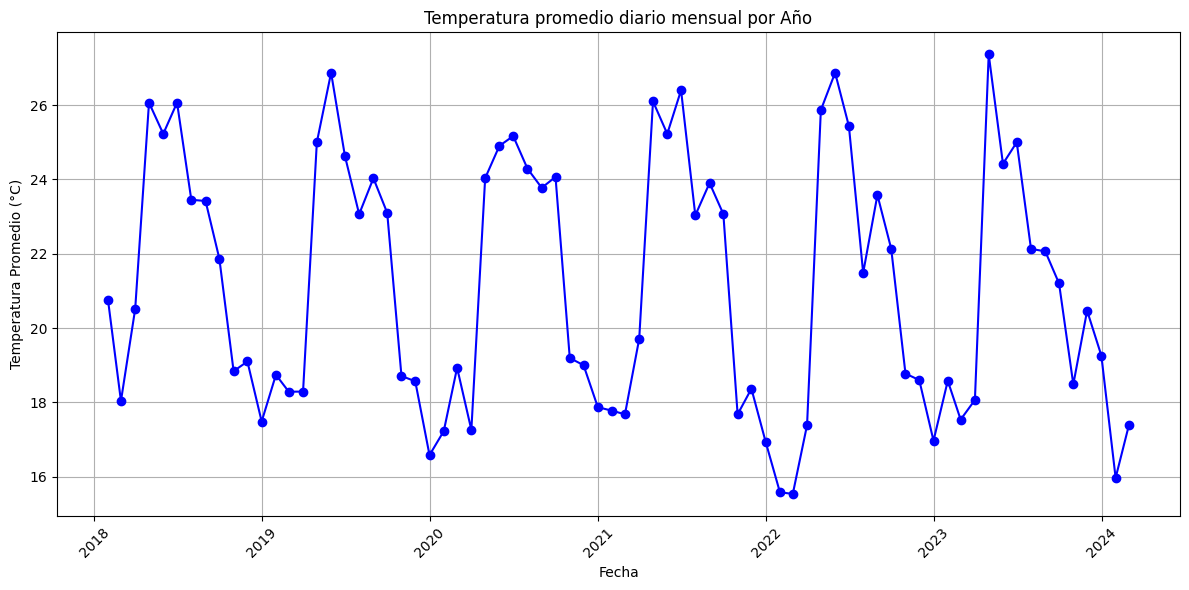

In [100]:
f_ver_temperaturas(datos['fecha'], datos['temperatura'])

## Matriz de correlación de las variables predictoras

Cuando hay mucha correlación lineal entre variables predictoras se considera que una variabe afecta a la otra por lo que es posible tomar la decisión de no considerar en el modelo alguna de ellas, finalmente se interpreta que una variable independiente afecta a otra variable independiente y ambas afectan a una variable dependiente.

En el caso de estas variables no hay correlaciones muy fuertes entre las variables independientes o predictoras.

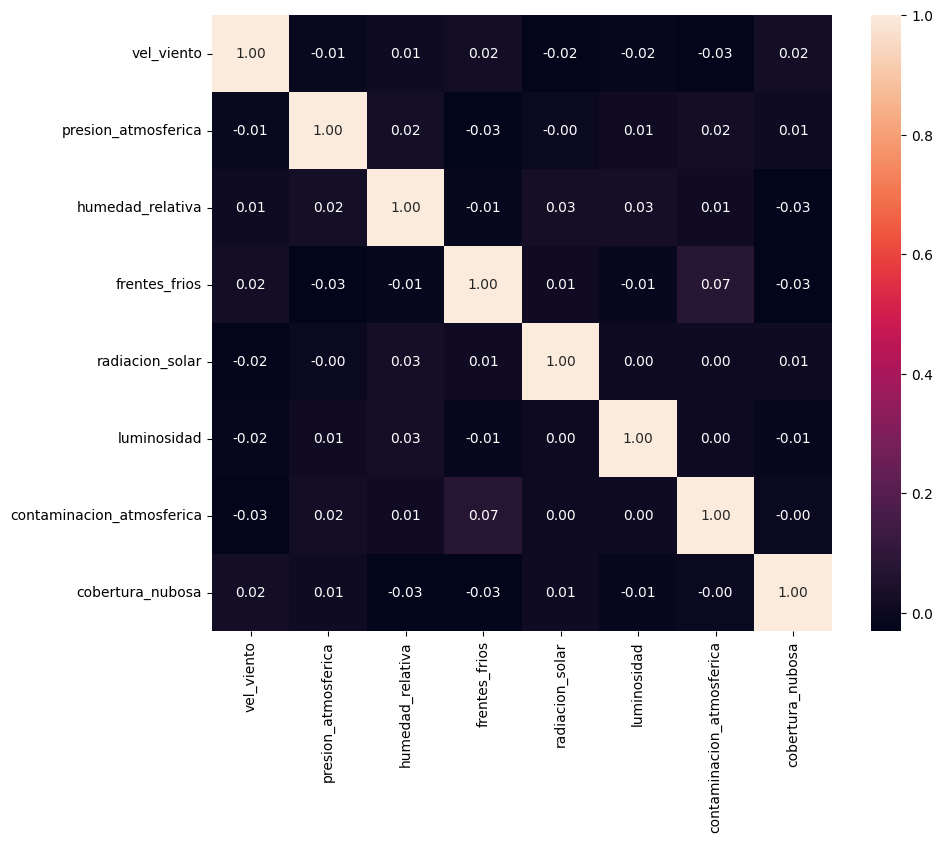

In [101]:
# Variables independientes excepto fecha y temperatura
variables_predictoras = datos.drop(columns=['fecha', 'temperatura'])
f_matriz_correlacion_variables(variables_predictoras)

## Crear datos de entrenamiento y validación

Los datos de entrenamiento son el 70% de los datos originales y los datos de validación son el 30%.

Con los datos de entrenamiento se construye el modelo de árboles de regresión.

Con los datos de validación se hacen prediccipnes y se evaluá el modelo.

In [102]:
# Preparar los datos para el modelo
X = datos.drop(columns=['fecha', 'temperatura'])  # Solo dejar las variables independientes o predictoras
y = datos['temperatura']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba o validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

f_visualizar_datos(X_train.sort_index().head(20), X_test.sort_index().head(20),
                   "Primeros registros. Datos de entrenamiento", "Primeros registros. Datos de validación")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Construir el modelo

### Transformación Polinomial grado 2

Se crea y enrtena el modelo polinomila multivariable de grado 2.

In [103]:
# Tal vez lo dejemos en una función ....
# Crear una instancia de PolynomialFeatures de grado 2
grado = 2

poly_transformer = PolynomialFeatures(degree=grado)

# Transformar las características
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo_grado2 = LinearRegression()
modelo_grado2.fit(X_train_poly, y_train)

LinearRegression()

### Hacer predicciones grado 2

Con los datos de validación se hacen las predicciones utilizando el modelo construído.




In [104]:
# Hacer predicciones sobre el conjunto de validación
predicciones = modelo_grado2.predict(X_test_poly)

### Evaluar el modelo grado 2

El coeficiente de determinación *RMSE* se utiliza como métrica para evaluar un modelo de regresión que significa que tanto se acercan las predicciones a los valores reales. Este valor debe ser comparado con otros modelos.

* *RMSE* o Coeficiente de Determinación:

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y})^2}{n}}
$$

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(real-predicciones)^2}{n}}
$$

* *r squared* es el valor de la correlación $r^2$ al cuadrado.

*r squared* es el estadístico para valorar la explicación de la variable dependiente en relación a sus predictores o variables independientes.

In [105]:
# Calcular y mostrar el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)


print ("Modelo polinomial multivariable de grado", grado, "\n")
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

r2 = r2_score(y_test, predicciones)

print(f"Coeficiente de Determinación (R^2) r squared: {r2:.2f}")

Modelo polinomial multivariable de grado 2 

Mean Squared Error: MSE 27.588344337477203
Root Mean Squared Error RMSE: 5.252460788761512
Coeficiente de Determinación (R^2) r squared: 0.33


### Predicción con valor nuevo grado 2

Los coeficientes del modelo polinomial de grado 2. Estos coeficientes estaría en la fórmula de predicción:

$$
\text{Pred Y} = β_0 + \beta_1\cdot x_1 + \beta_2\cdot x_2 + \beta_3\cdot x_1^{2} + \beta_5\cdot x_2^{2} + \beta_4\cdot x_1\cdot x_2 + ϵ
$$




In [106]:
print ("Coeficientes del modelo de grado ", grado)
print("Intersección: ", modelo_grado2.intercept_)
print ("Coeficientes B1, B2, B3 .... y Coeficienetes de interaccón o producto")
print(modelo_grado2.coef_)


Coeficientes del modelo de grado  2
Intersección:  31.718724701865053
Coeficientes B1, B2, B3 .... y Coeficienetes de interaccón o producto
[ 5.56083717e-11 -8.36919992e-03 -1.85393126e-02  3.14674379e-02
 -2.78863944e+00 -1.14563064e-02 -2.68343870e-01 -2.64346392e-02
  6.34893941e-02  1.20637406e-03 -3.56604188e-04  2.44734736e-04
  6.26605007e-02  5.01517740e-05  1.48555657e-03  1.94857728e-05
 -2.28784750e-03  1.50165161e-05 -9.20813480e-05 -1.76457770e-03
  3.08284471e-06  1.80396736e-04  2.03141542e-05  1.92766317e-04
  5.62593036e-04  9.08228614e-03  2.75588127e-05  6.70709482e-05
 -1.26799160e-05  2.49758229e-04 -2.78863944e+00  4.20314597e-04
  9.92197069e-03  6.86906315e-04  1.98995436e-03  8.50570132e-06
  3.32188392e-06 -3.68665455e-06  7.95981076e-06  4.45148565e-04
  4.78699321e-05  2.99491174e-04  3.19210983e-05 -5.30775679e-05
 -2.46606427e-03]


In [107]:
# Valores de un nuevo registro

v_vel_viento = 38 # x1
v_presion_atmosferica = 950 # x2
v_humedad_relativa = 80     # x3
v_frentes_frios = 0         # x4
v_radiacion_solar = 350     # x5
v_luminosidad = 50          # x6
v_contaminacion_atmosferica = 150  # x7
v_cobertura_nubosa = 20 # x8


nuevo = np.array([[v_vel_viento,
                   v_presion_atmosferica,
                   v_humedad_relativa,
                   v_frentes_frios,
                   v_radiacion_solar,
                   v_luminosidad,
                   v_contaminacion_atmosferica,
                   v_cobertura_nubosa]])

# Asumiendo que 'modelo_grado2' está ya entrenado y 'nuevo_registro' es tu array de NumPy para la predicción
nombres_variables = ['vel_viento', 'presion_atmosferica', 'humedad_relativa', 'frentes_frios', 'radiacion_solar', 'luminosidad', 'contaminacion_atmosferica', 'cobertura_nubosa']

# Convertir el array de NumPy a un DataFrame de pandas con los nombres de las columnas correctos
nuevo_registro_df = pd.DataFrame(nuevo, columns=nombres_variables)

# nuevo_nombre_poly = modelo_grado2.transform(nuevo_registro_df)

# Transformar el nuevo registro a términos polinomiales usando el transformador ajustado
nuevo_registro_poly = poly_transformer.transform(nuevo_registro_df)

# Realizar la predicción con el modelo entrenado
prediccion_temperatura = modelo_grado2.predict(nuevo_registro_poly)


# se muestra la predicción
print ("Modelo polinomial multivariable de grado", grado, " ", "\n")
print("Predicción con registro pandas DataFrame:", prediccion_temperatura[0])

Modelo polinomial multivariable de grado 2   

Predicción con registro pandas DataFrame: 17.557527196285804


Repetir el proceso desde la construcción del modelo a diferentes grados

### Transformación Polinomial grado 3

Se crea y entrena el modelo polinomial multivariable de grado 3.

In [108]:
# Tal vez lo dejemos en una función ....
# Crear una instancia de PolynomialFeatures de grado 3
grado = 3

poly_transformer = PolynomialFeatures(degree=grado)

# Transformar las características
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo_grado3 = LinearRegression()
modelo_grado3.fit(X_train_poly, y_train)

LinearRegression()

### Hacer predicciones grado 3

In [109]:
# Hacer predicciones sobre el conjunto de validación
predicciones = modelo_grado3.predict(X_test_poly)

### Evaluar el modelo grado 3

In [110]:
# Calcular y mostrar el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)


print ("Modelo polinomial multivariable de grado", grado, "\n")
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

r2 = r2_score(y_test, predicciones)

print(f"Coeficiente de Determinación (R^2) r squared: {r2:.2f}")

Modelo polinomial multivariable de grado 3 

Mean Squared Error: MSE 29.797800565249265
Root Mean Squared Error RMSE: 5.4587361692290335
Coeficiente de Determinación (R^2) r squared: 0.28


### Predicción con valor nuevo grado 3

Los coeficientes del modelo polinomial de grado. Estos coeficientes estaría en la fórmula de predicción:

$$
\text{Pred Y} = β_0 + \beta_1\cdot x_1 + \beta_2\cdot x_2 + \beta_3\cdot x_1^{2} + \beta_5\cdot x_2^{2} + \beta_4\cdot x_1\cdot x_2 + ϵ
$$



In [113]:
print ("Coeficientes del modelo de grado ", grado)
print("Intersección: ", modelo_grado3.intercept_)
print ("Coeficientes B1, B2, B3 .... y Coeficienetes de interaccón o producto")
print(modelo_grado3.coef_)

Coeficientes del modelo de grado  3
Intersección:  498.4345653677227
Coeficientes B1, B2, B3 .... y Coeficienetes de interaccón o producto
[-7.69156815e-06  1.29668489e+01 -1.97544728e+00 -3.56369796e+00
  1.76487964e+01  2.92323377e-01  1.20701470e+00  4.09483444e-01
  2.58117255e-01 -1.99671892e-01 -8.51465182e-03  2.82180570e-02
 -4.34493675e-01 -2.09848131e-03 -1.87541761e-02 -2.99800413e-03
 -9.41898827e-02  2.21212495e-03  5.02594834e-03 -6.29774854e-02
 -5.90724683e-04 -1.36227286e-03 -7.31636427e-04  2.23832062e-03
  6.78166919e-03 -9.17013835e-02  2.60833761e-04 -3.96894313e-03
  6.09750398e-04  1.26478212e-02  1.76488016e+01 -8.04827014e-03
  1.37716598e-01 -6.07349412e-03  4.14558561e-01  4.79235235e-05
  2.67166987e-04 -1.88707614e-07 -2.09171817e-04  4.25040924e-04
 -3.38117759e-05 -1.73277522e-02  2.21766521e-04 -3.02116313e-03
  6.04933678e-03  6.56209459e-04  9.92764179e-05 -1.34178464e-05
  1.08970923e-03  7.74312500e-06  5.80878963e-05  2.40257449e-05
  6.40102838e-04

Con el registro previamente construído con los nuevos datos de las variables, se utiliza el modelo entrenado de grado 3 para hacer la correspondiente predicción de temperatura.

In [112]:
# Transformar el nuevo registro a términos polinomiales usando el transformador ajustado
nuevo_registro_poly = poly_transformer.transform(nuevo_registro_df)

# Realizar la predicción con el modelo entrenado
prediccion_temperatura = modelo_grado3.predict(nuevo_registro_poly)


# se muestra la predicción
print ("Modelo polinomial multivariable de grado", grado, " ", "\n")
print("Predicción con registro pandas DataFrame:", prediccion_temperatura[0])

Modelo polinomial multivariable de grado 3   

Predicción con registro pandas DataFrame: 17.444442363629832


# Intrepretación

Para el modelo polinomial de grado **2** estos fueron los estadísticos a valorar:

* Root Mean Squared Error RMSE: 5.25; Coeficiente de Determinación ($r^{2}$) *r squared*: 0.33; la prediccón de temperatura fué de 17.55 con un error $\pm$ 5.25.

Para el modelo polinomial de grado **3** estos fueron los estadísticos a valorar:

* Root Mean Squared Error RMSE: 5.45; Coeficiente de Determinación ($r^{2}$) *r squared*: 0.28; la prediccón de temperatura fué de  17.44 con un error $\pm$ 5.45.
* El modelo se acepta si el valor de *r squared* está por encima del 50%*. Se está buscando un modelo que sobrepase el 50%, razón tal que el modelo de segundo grado y tercer grado tal vez no se acepten porque tienen valore se *r squared* de 33% y 28% respectivamente.Ambos no sobrepasan el 50%.

Entonces comparando la eficiencia con otros modelos ... ...:

* El valor de *RMSE* se comparará con otros modelos.

comparando modelos:
  * Con el modelo de regresión múltiple; estadístico RMSE de 5.35; r squared aproximado del 30%; https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing
  * Con el modelo árbol de regresión con profunidad = 3; RMSE 5.58; r squared aproximadamente 24%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

  * Con el modelo de *random forest* con 300 árboles; *RMSE* de 5.28; *r squared* es aproximadamente de 32%; https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing
  * Modelo polinomial multivariable de grado 2: Root Mean Squared Error RMSE: 5.25;  *r squared*: 0.33; la prediccón de temperatura fué de 17.55.
  * Modelo polinomial multivariable de gado. 3: Root Mean Squared Error RMSE: 5.45; Coeficiente de Determinación ($r^{2}$) *r squared*: 0.28; la prediccón de temperatura fué de  17.44.

  Hasta el momento, comparando modelos de regresión con mútiples variables, utilizando los mismos datos de origen, con los mismos datos de entrenamiento y los mismos datos de validación, el mejor modelo es el modelo polinomial multivariable de segundo grado o grado 2 ya que tiene un menor *RMSE* que significa que el margen de error al predecir temperaturas es menor que todos los demás.




